In [1]:
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fidparam = np.array([0, 0, 0, 0, 0, 0, 0 ,0])
symbols = ['$x1$', '$x2$','$x3$', '$x4$', '$x5$', '$x6$','$x7$', '$x8$']

In [3]:
filename = "mcmc_data.h5"
reader = emcee.backends.HDFBackend(filename)

In [4]:
samples = reader.get_chain(flat=False)
nwalkers = 100
ndim = len(fidparam)

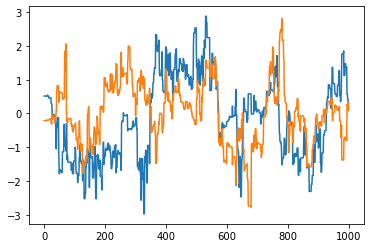

In [5]:
burn_in = 0
chainno = 5
debug_samples = samples
plt.plot(debug_samples[burn_in:, chainno, 0])
plt.plot(debug_samples[burn_in:, chainno, 1])

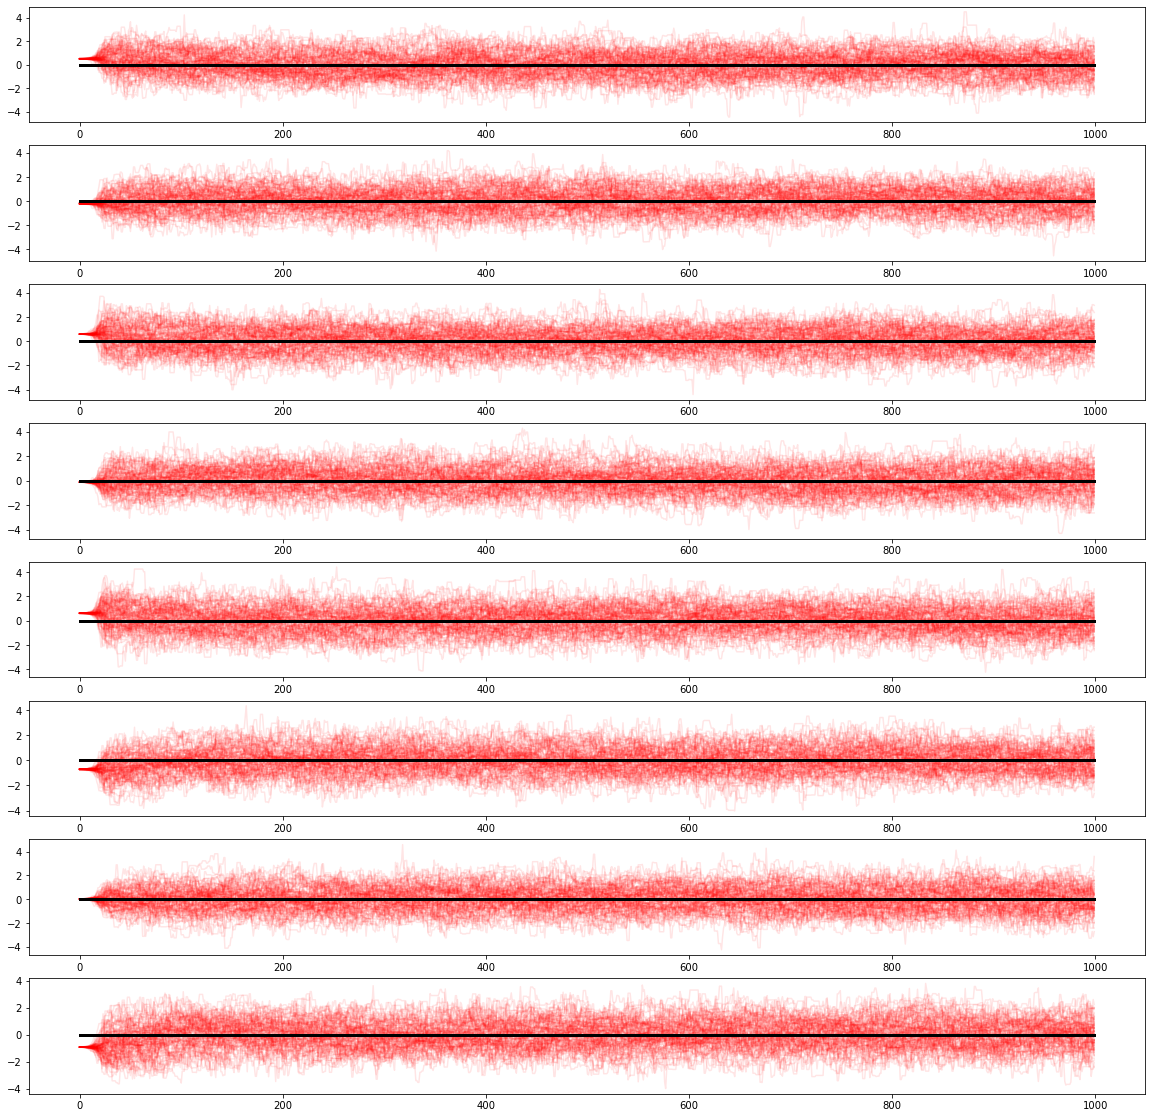

In [6]:
fig1, axes1 = plt.subplots(ndim, 1, figsize=(20,20), sharex=False, sharey=False)

line_len = len(samples[:, 0])-burn_in#len(sig8)
chain_len = nwalkers

param_len = ndim

param_no = 0
while(param_no < param_len):
    chain = 0
    while(chain < chain_len):
        axes1[param_no].plot(samples[burn_in:, chain, param_no], alpha=0.1, color='red')
        chain+=1
    param_no+=1

    
axes1[0].plot([fidparam[0]]*line_len, color="k", lw=3)
axes1[1].plot([fidparam[1]]*line_len, color="k", lw=3)
axes1[2].plot([fidparam[0]]*line_len, color="k", lw=3)
axes1[3].plot([fidparam[1]]*line_len, color="k", lw=3)
axes1[4].plot([fidparam[0]]*line_len, color="k", lw=3)
axes1[5].plot([fidparam[1]]*line_len, color="k", lw=3)
axes1[6].plot([fidparam[0]]*line_len, color="k", lw=3)
axes1[7].plot([fidparam[1]]*line_len, color="k", lw=3)


In [7]:
samples.shape

(1000, 100, 8)

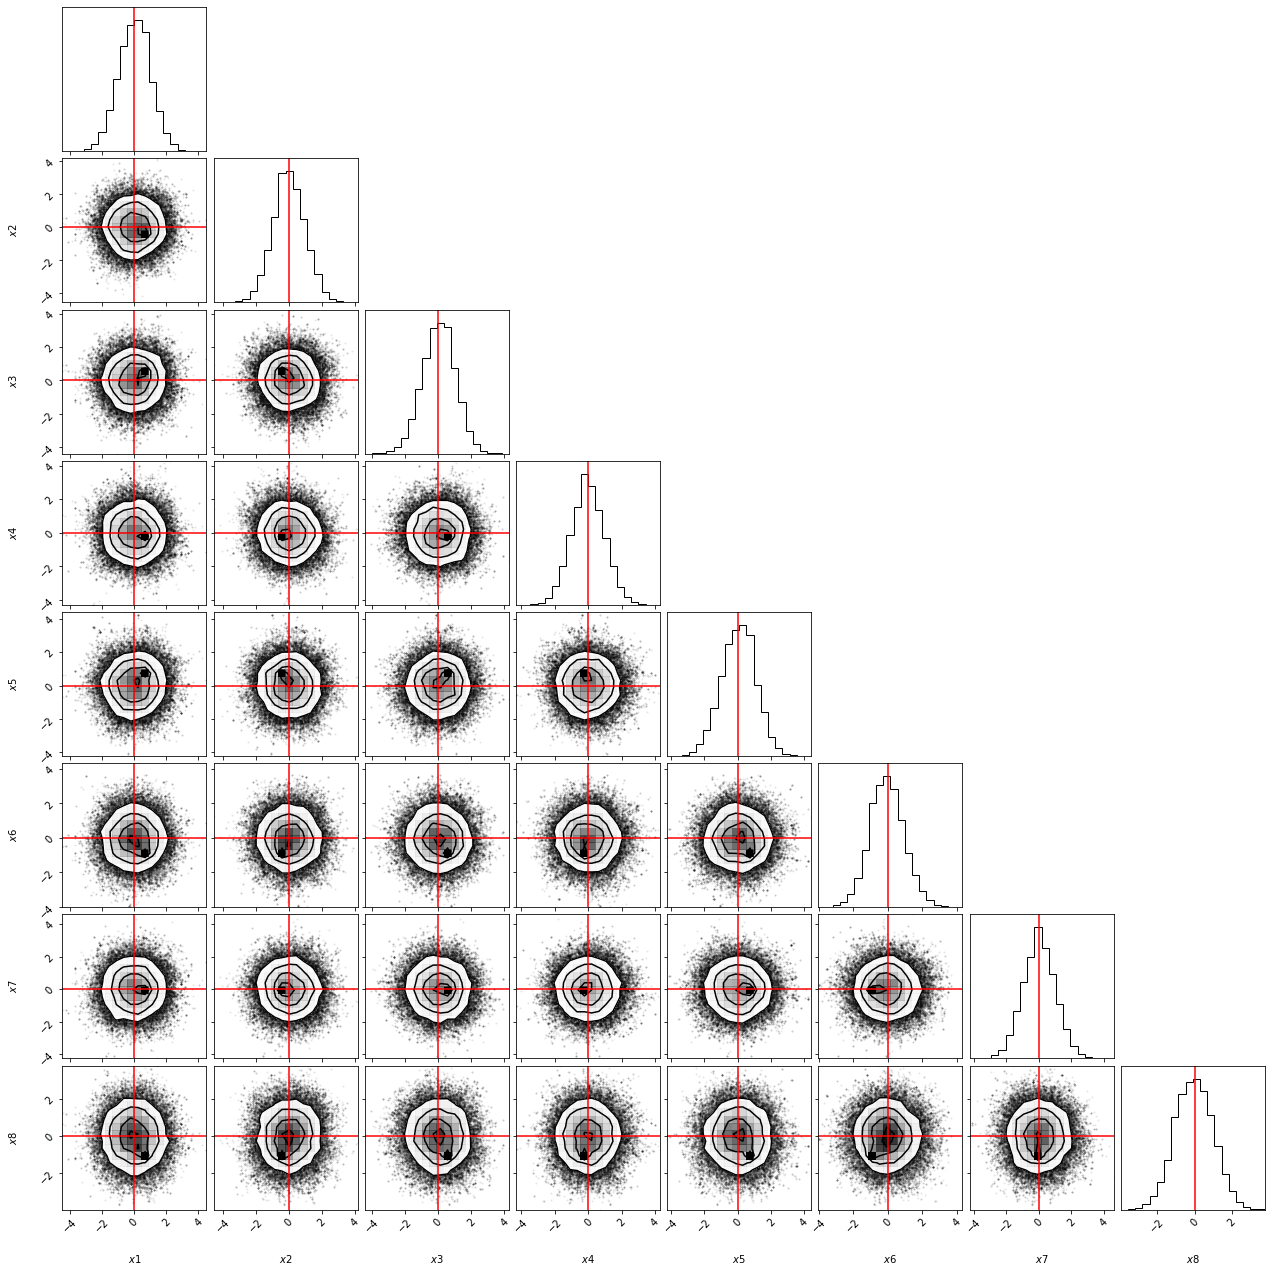

In [8]:
samples = reader.get_chain(flat=True)
figure = corner.corner(samples[burn_in*nwalkers:, :], labels=symbols)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(fidparam[i], color="r")

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(fidparam[xi], color="r")
        ax.axhline(fidparam[yi], color="r")
        ax.plot(fidparam[xi], fidparam[yi], "r")